# Deep Learning with PyTorch

### 1.8 Accessing popular datasets via torchvision and torchtext

**Objective**: Learn how to access popular datasets via PyTorch utilities

**Let's access the CIFAR10 dataset via torchvision**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

print(torchvision.__version__)

0.2.1


In [2]:
# Transforms are applied to each image. Some are mandatory, like conversion to Tensor and 
# Normalize the image. Others are optional and used for data augmentation (like random crop, 
# random jitter etc.)

transform = transforms.Compose([transforms.ToTensor(), 
                                # Various transforms can be added in this pipeline for data augmentation
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

`torch.utils.data.Dataset`

All datasets (like CIFAR10) are inherited from torch.utils.data.Dataset abstract class. `torch.utils.data.Dataset` represents a dataset, and via the `__len__()` and `__iter__()` functions allows it's client to iterate through the dataset. Custom implementations would read custom datasets and provide a standard interface to it's clients.

In the below example, the CIFAR10 class did the work for us in loading CIFAR10 data. It has mechanisms to download the dataset from source, unpack it, and provide us the necessary iterators.


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [4]:
len(trainset.train_data)

50000

In [9]:
print(trainset.train_data)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ..., 
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ..., 
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ..., 
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ..., 
  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ..., 
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ..., 
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ..., 
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ..., 
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ..., 
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ..., 
   [ 79  82  64]
   [ 68  

In [11]:
print(trainset.train_data[2])

[[[255 255 255]
  [253 253 253]
  [253 253 253]
  ..., 
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ..., 
 [[113 120 112]
  [111 118 111]
  [105 112 106]
  ..., 
  [ 72  81  80]
  [ 72  80  79]
  [ 72  80  79]]

 [[111 118 110]
  [104 111 104]
  [ 99 106  98]
  ..., 
  [ 68  75  73]
  [ 70  76  75]
  [ 78  84  82]]

 [[106 113 105]
  [ 99 106  98]
  [ 95 102  94]
  ..., 
  [ 78  85  83]
  [ 79  85  83]
  [ 80  86  84]]]


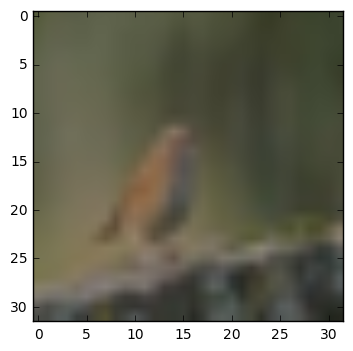

9  - Happens to be the truck class


In [19]:
plt.imshow(trainset.train_data[910])
plt.show()
print(trainset.train_labels[1], " - Happens to be the truck class")

`torch.utils.data.DataLoader`

DataLoader can load multiple samples parallelly. It provides an iterater to fetch one batch at a time, with the batchsize as specified.

DataLoader helps in:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

In [20]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

A training loop skeleton

In [8]:
# for i, data in enumerate(trainloader):

#     data, labels = data
    
#     print("Iteration ", i)
#     print("")
#     print("type(data): ", type(data))
#     print("data.size(): ", data.size())
#     print("")
#     print("type(labels): ", type(labels))
#     print("labels.size(): ", labels.size())
    
#     # Model training happens here
    
#     break

**Datasets available**

* MNIST
* Fashion-MNIST
* EMNIST
* COCO
* Captions
* Detection
* LSUN
* ImageFolder
* Imagenet-12
* CIFAR
* STL10
* SVHN
* PhotoTour